In [1]:
import squigglepy as sq

from datetime import datetime
from pprint import pprint

from libs import plot_exponential_growth
from params import start_task_length, agi_task_length, doubling_time, shift, current_best_date


O3_LAUNCH_DATE = datetime(2025, 4, 16)
CLAUDE_3P7_LAUNCH_DATE = datetime(2025, 2, 24)

print("Loaded libraries")

## START task length (displayed in sec) ##
{1: 1.0,
 5: 1.0,
 10: 1.0,
 20: 1.0,
 30: 1.85,
 40: 3.91,
 50: 7.7,
 60: 14.89,
 70: 29.94,
 80: 67.15,
 90: 212.18,
 95: 553.61,
 99: 3204.31}



## AGI task length (displayed in hrs) ##
{1: 40,
 5: 50,
 10: 80,
 20: 139,
 30: 207,
 40: 291,
 50: 399,
 60: 549,
 70: 774,
 80: 1145,
 90: 2007,
 95: 3157,
 99: 7435}



## DOUBLING TIME (displayed in days) ##
{1: 95,
 5: 118,
 10: 118,
 20: 118,
 30: 134,
 40: 160,
 50: 186,
 60: 212,
 70: 212,
 80: 212,
 90: 222,
 95: 253,
 99: 317}



## SHIFT (displayed in days) ##
{1: 0,
 5: 30,
 10: 56,
 20: 88,
 30: 112,
 40: 131,
 50: 150,
 60: 168,
 70: 188,
 80: 211,
 90: 244,
 95: 271,
 99: 319}
Loaded libraries


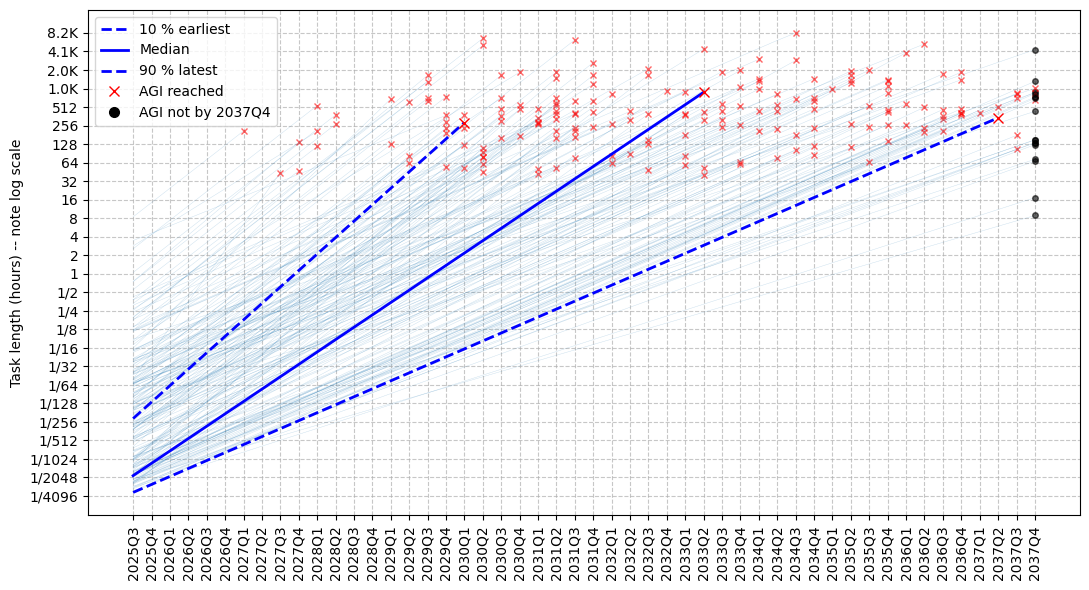

In [5]:
samples = plot_exponential_growth(
    doubling_time_days=doubling_time,
    start_hours=start_task_length,
    start_date=current_best_date,
    agi_task_length=agi_task_length,
    shift=shift,
    n_quarters=49,
    n_samples=100_000,
    n_traces=200,
    max_task_power=13,
    min_y_power=-15,
)

In [3]:
# -----------
# ACCELERATION: Is the curve actually superexponential or subexponential? Does the doubling time itself change? Set the curve parameter.

print("\n\n")
print("## ACCELERATION")
acceleration = sq.mixture(
    [
        [0.1, 1 + sq.lognorm(0.005, 0.1, credibility=80)],
        [0.8, 1],
        [0.1, 1 - sq.lognorm(0.005, 0.1, credibility=80)],
    ]
)
pprint(sq.get_percentiles(acceleration @ 100_000, digits=3))




## ACCELERATION
{1: 0.901,
 5: 0.977,
 10: 0.999,
 20: 1.0,
 30: 1.0,
 40: 1.0,
 50: 1.0,
 60: 1.0,
 70: 1.0,
 80: 1.0,
 90: 1.0,
 95: 1.022,
 99: 1.101}
